**Simulated SAR Data**

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [59]:
rows, cols = 500, 500
image = np.zeros((rows, cols, 2))
image[:, :, 0] = np.random.normal(loc=0, scale=1, size=(rows, cols))
image[:, :, 1] = np.random.uniform(-np.pi, np.pi, size=(rows, cols))



complex_image = image[:, :, 0] + 1j*image[:, :, 1]
phase = np.imag(complex_image)
magnitude = np.real(complex_image)

In [60]:
amplitude = np.abs(complex_image)

In [61]:
intensity = amplitude**2

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_pdf(data, title, ax, bins=50):
    ax.hist(data.ravel(), bins=bins, density=True, alpha=0.5, label='Empirical')
    kde = gaussian_kde(data.ravel())
    x = np.linspace(min(data.ravel()), max(data.ravel()), 1000)
    ax.plot(x, kde(x), label='Estimated KDE')
    ax.set_title(title)
    ax.legend()



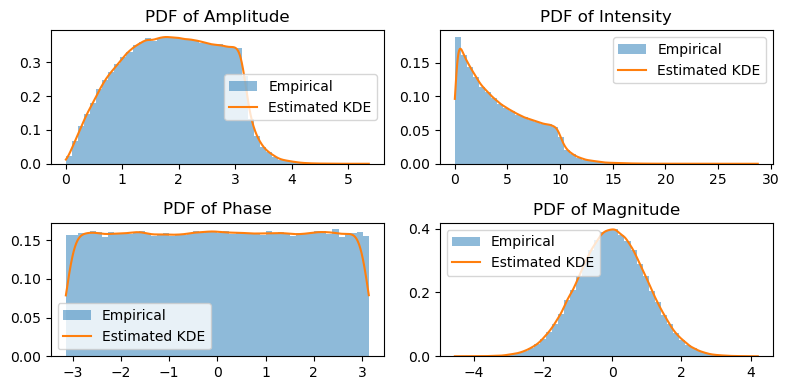

In [63]:
# Crear un grid de 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 4))

# Graficar PDFs en los subplots
plot_pdf(amplitude, 'PDF of Amplitude', axs[0, 0])
plot_pdf(intensity, 'PDF of Intensity', axs[0, 1])
plot_pdf(phase, 'PDF of Phase', axs[1, 0])
plot_pdf(magnitude, 'PDF of Magnitude', axs[1, 1])

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

**Real SAR Data**

In [6]:
sar_image = np.load('/home/tonix/Documents/Dayana/Dataset/training/tsx_hh_slc_koeln.npy')

complex_sar = sar_image[0:500, 0:500, 0] + 1j * sar_image[0:500 ,0:500 , 1]

phase_sar = np.angle(complex_sar)
magnitude_sar = (np.real(complex_sar) - np.min(np.real(complex_sar)))/(np.max(np.real(complex_sar)) - np.min(np.real(complex_sar)))

In [7]:
amplitude_sar = (np.abs(complex_sar) - np.min(np.abs(complex_sar)))/(np.max(np.abs(complex_sar)) - np.min(np.abs(complex_sar)))
intensity_sar = np.log(amplitude_sar**2 + 0.00001)

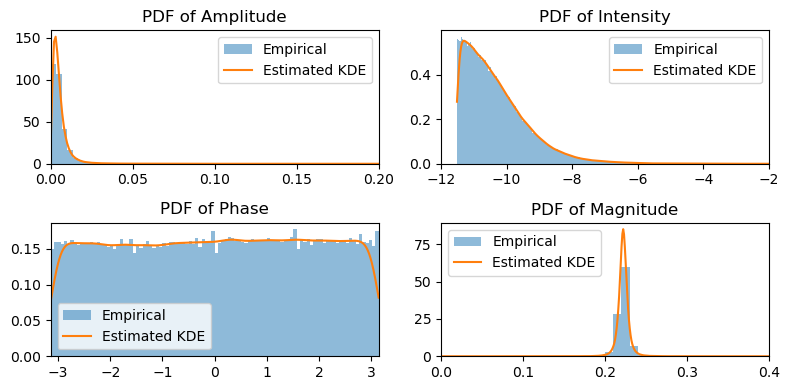

In [11]:
# Crear un grid de 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 4))

# Graficar PDFs en los subplots
plot_pdf(amplitude_sar, 'PDF of Amplitude', axs[0, 0], bins=300)
plot_pdf(intensity_sar, 'PDF of Intensity', axs[0, 1], bins=300)
plot_pdf(phase_sar, 'PDF of Phase', axs[1, 0], bins=100)
plot_pdf(magnitude_sar, 'PDF of Magnitude', axs[1, 1], bins=100)

# Ajustar los límites de los ejes después de graficar
axs[0, 0].set_xlim(0, 0.2)  # Amplitud
axs[0, 1].set_xlim(-12, -2)  # Intensidad
axs[1, 0].set_xlim(-np.pi, np.pi)  # Fase
axs[1, 1].set_xlim(0, 0.4)  # Magnitud

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()
